#### The purpose of this project is to predict que accidents severity in Seattle , the labels are unbalanced, and we need to do some feature engineering


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

### For this week, you will required to submit the following


- 1.-A description of the problem and a discussion of the background. 
- 2.-A description of the data and how it will be used to solve the problem.



A full report consisting of all of the following components 

- Introduction where you discuss the business problem and who would be interested in this project.
- Data where you describe the data that will be used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
- Results section where you discuss the results.
- Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
- Conclusion section where you conclude the report.

Your choice of a presentation or blogpost.

print(" Hello Capstone Project Course!")

1.-


The main objective of this porject is predict the severity of an accident, in order to kwon if we need to change our travel or keep the same way, we have different codes of accidents, they are numerical data divide in two categories, one categorie is prop damage and the other one is accident with a injury, we have an unbalanced values in the dataset, they are more values in one categori.

This accidents are from a traffic jam of the highway. The people that involved in the accidents were transported in a helicopter to the nearters hospital.

Based in the data, like localization, total number of people in the accident, number of vehicles involved in the accident, etc, we need to accurate the prediction


2.-
The data 

- 38 Columns one of them is the target(Severity) 
- 194673 rows
- Some Fautures have NaN values 
- We need to find the most significant columns for the prediction

In the prespective some important features are 

- Coordinates
- Total Number of people involved in the collions 
- Number of pederastioans involved in the collision
- Number of vehicules involved in the collision
- The fatalities in the collision 
- If the speed was a factor in the collision


The way that I will solve the problem is make a exploratory data analysis in order to inspect the features, check missing values,  replace missing values or even transform the data because we have a lot columns with text and only some numerical values, another issue is that unbalanced categories on the target column. After apply this transformation, I will do a feature engenering on order to keep o delete some columns, finally I will aplly a algorithm to predict the severity of the accident also with the performance metris that I need to have accurate model.

The problem to be solved may be interesting for people who want to create an application to release traffic or dangerous areas in a highway or streets city

Source of the Data : SDOT Traffic Management Division, Traffic Records Group

Metadata : https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf





Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

Results section where you discuss the results.

Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.

Conclusion section where you conclude the report.

### Methodology section 

- EDA
- Feature Engeneering
- Inferencial testing
- Model

In [2]:
df_all = pd.read_csv("/home/aldair913/Documents/coursera/Data-Collisions.csv",  low_memory=False)
df_all.drop(columns = ["SEVERITYCODE.1"], inplace = True)

In [3]:
df_all.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

### Balanceando Data Set pero con perdida de informacion

In [4]:
X = df_all.drop(columns = "SEVERITYCODE")
y = df_all["SEVERITYCODE"]
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
undersamp = RandomUnderSampler(random_state=1)
df, df_severity = undersamp.fit_resample(df_train, y_train)
df["SEVERITYCODE"] = df_severity

In [5]:
df["SEVERITYCODE"].value_counts()

2    40877
1    40877
Name: SEVERITYCODE, dtype: int64

In [6]:
df.head(1)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE
0,-122.329124,47.608658,219219,312190,313610,E887807,Matched,Intersection,29926.0,8TH AVE AND SPRING ST,...,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N,1


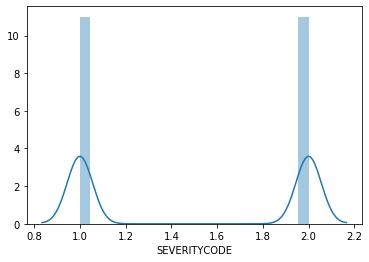

In [7]:
sns.distplot(df["SEVERITYCODE"], hist=True)

In [8]:
df["SEVERITYCODE"].value_counts()

2    40877
1    40877
Name: SEVERITYCODE, dtype: int64

### Determiando el porcentaj de valores NaN en el dataset

In [9]:
def create_procentaje_nan(df) -> pd.DataFrame:
    """Create a dataframe with nan porcertage values"""
    nan_columns = pd.DataFrame(df.isna().sum() * 100 / len(df))
    nan_columns.reset_index(inplace = True)
    nan_columns.columns = ["Column", "Number_values"]
    nan_columns.sort_values("Number_values", ascending=False, inplace=True)
    return nan_columns

#### Muchos Valores NaN, vamos a borrar las columnas que tengan mas del 40 % de valores nan

In [10]:
create_procentaje_nan(df).head()

,Column,Number_values
11,EXCEPTRSNDESC,97.744453
28,PEDROWNOTGRNT,96.257064
30,SPEEDING,94.867529
23,INATTENTIONIND,83.869902
8,INTKEY,62.447097


In [11]:
def drop_miscolumns(df, portentage_miss) -> pd.DataFrame:
    """Return dataframe with columns with less portentage_miss"""
    df_copy = df.copy()
    porcentage_missv = pd.DataFrame(df_copy.isna().sum() * 100 / len(df))
    porcentage_missv.reset_index(inplace = True)
    porcentage_missv.columns = ["Columns", "Percentage"]
    porcentage_missv.sort_values("Percentage", ascending=False, inplace=True)
    mask = porcentage_missv.Percentage >= portentage_miss
    list_del = porcentage_missv[mask].Columns.values
    df_copy.drop(columns = list_del, inplace = True)
    return df_copy

In [12]:
df2 = drop_miscolumns(df, 35)

### Deleting 7 columns with more than 35% nan values

In [13]:
df2.head(1)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYDESC,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SEVERITYCODE
0,-122.329124,47.608658,219219,312190,313610,E887807,Matched,Intersection,8TH AVE AND SPRING ST,Property Damage Only Collision,...,N,Overcast,Dry,Dark - Street Lights On,10,Entering at angle,0,0,N,1


In [14]:
df2.dropna(inplace = True)
create_procentaje_nan(df2).head()

,Column,Number_values
0,X,0.0
1,Y,0.0
28,HITPARKEDCAR,0.0
27,CROSSWALKKEY,0.0
26,SEGLANEKEY,0.0


In [15]:
#creando dataframes segun el tipo de columna
def create_df_bydatatype(df_) -> pd.DataFrame:
    df_funcion = df_.copy()
    list_objects2 = list(df_funcion.select_dtypes(include=["object"]).columns)
    print(f"List objects type------------------------------------------------")
    print()
    print(list_objects2)
    print(f"List float type---------------------------------------------------")
    print()
    list_float2 = list(df_funcion.select_dtypes(include=["float64"]).columns)
    print(list_float2)
    print(f"List int type------------------------------------------------------")
    print()
    list_int2 = list(df_funcion.select_dtypes(include=["int64"]).columns)
    print(list_int2)
    return df_funcion[list_objects2], df_funcion[list_float2], df_funcion[list_int2] 

In [80]:
df_objects, df_float, df_int = create_df_bydatatype(df2)

List objects type------------------------------------------------

['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR']
List float type---------------------------------------------------

['X', 'Y']
List int type------------------------------------------------------

['OBJECTID', 'INCKEY', 'COLDETKEY', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYCODE']


In [17]:
#df_objects.drop(columns=["REPORTNO", "LOCATION", "INCDATE", "INCDTTM", "SDOT_COLDESC", "ST_COLCODE", "ST_COLDESC"], inplace=True)
#for i in range(0, len(df_objects.columns)):
#    print(df_objects.iloc[:, i].value_counts())
#print("-----------------------------------")
#df_int.drop(columns = ["SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY"], inplace = True )

### Trantando datos por tipo de valor

In [18]:
df_int.columns

Index(['OBJECTID', 'INCKEY', 'COLDETKEY', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'SEVERITYCODE'],
      dtype='object')

In [19]:
df_int.drop(columns = ["OBJECTID", "INCKEY", "COLDETKEY", "SEGLANEKEY", "CROSSWALKKEY"], inplace=True)

In [20]:
X_train_int = df_int.drop(columns= "SEVERITYCODE").values
y_train_int = df_int["SEVERITYCODE"].values

In [21]:
def select_intbest(X, y):
    fs = SelectKBest(score_func=f_classif, k = "all")
    fs.fit(X, y)
    X_train_fs = fs.transform(X)
    return X_train_fs, fs

X_int_values, fs = select_intbest(X_train_int, y_train_int)

Feature 0: 1306.019038
Feature 1: 3829.050265
Feature 2: 2780.313650
Feature 3: 594.082239
Feature 4: 2152.334807


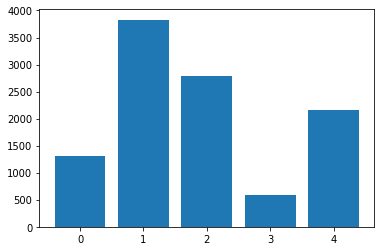

In [22]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [23]:
int_info = pd.DataFrame(fs.scores_)
int_info["columns"] = df_int.drop(columns= "SEVERITYCODE").columns
int_info.sort_values(by = 0, ascending=False)

,0,columns
1,3829.050265,PEDCOUNT
2,2780.313650,PEDCYLCOUNT
4,2152.334807,SDOT_COLCODE
0,1306.019038,PERSONCOUNT
3,594.082239,VEHCOUNT


### Int columns
* PEDCOUNT
* PEDCYLCOUNT
* SDOT_COLCODE
* PERSONCOUNT

In [24]:
for i in range(0, len(df_int.columns)):
    print(df_int.iloc[:, i].value_counts())
    print("-----------------------------------")

2     42055
3     15523
4      6669
1      4285
5      3142
0      2314
6      1319
7       583
8       279
9       118
10       71
11       24
12       13
13       12
15        7
17        7
14        5
16        5
34        3
28        2
20        2
22        2
24        2
27        2
19        2
54        1
48        1
18        1
21        1
23        1
30        1
32        1
37        1
39        1
44        1
47        1
81        1
Name: PERSONCOUNT, dtype: int64
-----------------------------------
0    71917
1     4373
2      144
3       19
4        3
6        1
5        1
Name: PEDCOUNT, dtype: int64
-----------------------------------
0    72995
1     3431
2       32
Name: PEDCYLCOUNT, dtype: int64
-----------------------------------
2     56111
1     12727
3      6006
4      1105
5       267
0       139
6        68
7        20
8         7
9         5
11        2
10        1
Name: VEHCOUNT, dtype: int64
-----------------------------------
11    34233
14    22346
24     4246


In [25]:
drop_object = ["REPORTNO", "INCDATE", "INCDTTM", "ST_COLDESC", "STATUS", "SEVERITYDESC"]
df_objects.drop(columns = drop_object, inplace  = True)
df_objects["UNDERINFL"].replace({"0" : "N", "1" : "Y"}, inplace = True)
#df_objects["UNDERINFL"].replace({"N": 0, "Y" : 1, "0" : 0, "1" : 1}, inplace = True)
#df_objects["HITPARKEDCAR"].replace({"N" : 0, "Y" : 1}, inplace = True)
#df_objects["SEVERITYDESC"].replace({"Injury Collision" : 0, "Property Damage Only Collision" : 1}, inplace = True)
#df_objects["ADDRTYPE"].replace({"Block" : 0, "Intersection" : 1}, inplace = True)

In [26]:
df_objects.drop(columns = "SDOT_COLDESC", inplace  = True)

In [27]:
for i in range(0, len(df_objects.columns)):
    print(df_objects.iloc[:, i].value_counts())
    print("-----------------------------------")

Block           46595
Intersection    29863
Name: ADDRTYPE, dtype: int64
-----------------------------------
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST              141
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N    125
6TH AVE AND JAMES ST                                        116
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST              102
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST       101
                                                           ... 
DAYTON AVE N BETWEEN N 80TH ST AND N 81ST ST                  1
32ND AVE BETWEEN E PIKE ST AND E PINE ST                      1
KENSINGTON PL N BETWEEN N 52ND ST AND N 53RD ST               1
39TH AVE SW BETWEEN SW FRONTENAC ST AND SW MYRTLE ST          1
36TH AVE NE AND NE 57TH ST                                    1
Name: LOCATION, Length: 16881, dtype: int64
-----------------------------------
Angles        15666
Rear Ended    15627
Parked Car    13845
Other          8796
Sideswipe      6414
Left Tu

In [28]:
#le = LabelEncoder()
#df_objects["test2"] = oe.fit_transform(df_objects.loc[:, ["HITPARKEDCAR"]])

In [29]:
df_objects["SEVERITYCODE"] = df["SEVERITYCODE"]
X = df_objects.drop(columns = ["SEVERITYCODE", "LOCATION"])
X = X.astype("str")
y = df_objects["SEVERITYCODE"]

In [30]:
# prepare input data
def prepare_inputs(X_train):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    return X_train_enc

In [31]:
def prepare_target(y):
    oe = LabelEncoder()
    oe.fit(y)
    y_train_enc = oe.transform(y)
    return y_train_enc

In [114]:
X_enc = prepare_inputs(X)
y_enc = prepare_target(y)

In [33]:
y_enc

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
X_enc

array([[ 1.,  0.,  1., ...,  2.,  2.,  0.],
       [ 0.,  5.,  4., ...,  8., 26.,  0.],
       [ 0.,  7.,  3., ...,  5.,  6.,  0.],
       ...,
       [ 1.,  0.,  1., ...,  5.,  2.,  0.],
       [ 0.,  7.,  4., ...,  5.,  6.,  0.],
       [ 0.,  7.,  3., ...,  6.,  6.,  0.]])

In [96]:
final_columns

['PEDCOUNT',
 'PEDCYLCOUNT',
 'SDOT_COLCODE',
 'PERSONCOUNT',
 'LOCATION',
 'ST_COLCODE',
 'JUNCTIONTYPE',
 'COLLISIONTYPE',
 'WEATHER',
 'ADDRTYPE',
 'X',
 'Y',
 'LOCATION']

In [97]:
object_final_lt

['ST_COLCODE',
 'COLLISIONTYPE',
 'JUNCTIONTYPE',
 'ADDRTYPE',
 'ROADCOND',
 'LIGHTCOND',
 'WEATHER',
 'LOCATION']

In [104]:
x_test = df_test[object_final_lt]

In [106]:
x_test.dropna(inplace  = True)

/home/aldair913/Downloads/yes/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
x_test = prepare_inputs(x_test)

In [109]:
x_test

array([[7.0000e+00, 3.0000e+00, 4.0000e+00, ..., 2.0000e+00, 6.0000e+00,
        4.9760e+03],
       [3.0000e+01, 1.0000e+00, 2.0000e+00, ..., 5.0000e+00, 6.0000e+00,
        1.4748e+04],
       [2.5000e+01, 5.0000e+00, 4.0000e+00, ..., 8.0000e+00, 1.0000e+01,
        1.3129e+04],
       ...,
       [3.0000e+00, 9.0000e+00, 4.0000e+00, ..., 5.0000e+00, 1.0000e+00,
        1.5333e+04],
       [6.0000e+00, 7.0000e+00, 4.0000e+00, ..., 5.0000e+00, 4.0000e+00,
        1.2521e+04],
       [2.5000e+01, 5.0000e+00, 4.0000e+00, ..., 5.0000e+00, 1.0000e+00,
        5.8740e+03]])

In [111]:
y_test = prepare_target(y_test)

In [112]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_enc,y_enc)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [118]:
yhat = LR.predict(x_test)

ValueError: X has 8 features per sample; expecting 9

In [34]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_enc, y_enc)
X_fs = fs.transform(X_enc)

Feature 0: 0.023550
Feature 1: 0.131685
Feature 2: 0.029519
Feature 3: 0.001430
Feature 4: 0.019415
Feature 5: 0.020506
Feature 6: 0.020075
Feature 7: 0.141050
Feature 8: 0.006713


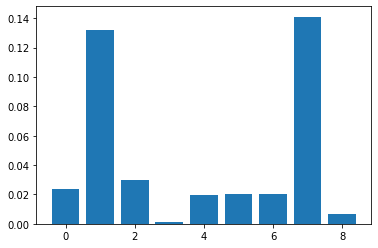

In [58]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [59]:
len(X.columns)

9

In [60]:
chi_test = pd.DataFrame(fs.scores_)
chi_test["columns"] = X.columns
chi_test.sort_values(by = 0, ascending=False, inplace = True)

In [68]:
object_final_lt = chi_test["columns"][0:7].values

In [62]:
chi_test

,0,columns
7,0.141050,ST_COLCODE
1,0.131685,COLLISIONTYPE
2,0.029519,JUNCTIONTYPE
0,0.023550,ADDRTYPE
5,0.020506,ROADCOND
6,0.020075,LIGHTCOND
4,0.019415,WEATHER
8,0.006713,HITPARKEDCAR
3,0.001430,UNDERINFL


#### Object Columns
* LOCATION
* ST_COLCODE
* JUNCTIONTYPE
* COLLISIONTYPE
* WEATHER
* ADDRTYPE

In [38]:
def select_features(X, y):
    fs = SelectKBest(score_func = mutual_info_classif, k = "all")
    fs.fit(X, y)
    X_train_fs = fs.transform(X)
    return X_train_fs, fs

In [39]:
X_train_fs, fs = select_features(X_enc, y_enc)

In [40]:
for i in range(len(fs.scores_)):
    print(f"Feature {i} : {fs.scores_[i]}")

Feature 0 : 0.023550073825771234
Feature 1 : 0.13168459275524125
Feature 2 : 0.02951893205863132
Feature 3 : 0.0014300766240304963
Feature 4 : 0.019415310240128214
Feature 5 : 0.020505960071633522
Feature 6 : 0.020074936342008076
Feature 7 : 0.14104969137708956
Feature 8 : 0.006712667611573853


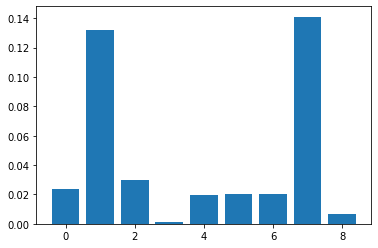

In [41]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [42]:
mutual_info = pd.DataFrame(fs.scores_)
mutual_info["columns"] = X.columns
mutual_info.sort_values(by = 0, ascending=False)

,0,columns
7,0.141050,ST_COLCODE
1,0.131685,COLLISIONTYPE
2,0.029519,JUNCTIONTYPE
0,0.023550,ADDRTYPE
5,0.020506,ROADCOND
6,0.020075,LIGHTCOND
4,0.019415,WEATHER
8,0.006713,HITPARKEDCAR
3,0.001430,UNDERINFL


In [76]:
object_final_lt = list(object_final_lt)
object_final_lt.append("LOCATION")

In [84]:
object_final_lt.remove("LOCATION")

In [89]:
df_object_final = df_objects[object_final_lt]
x_train_log = prepare_inputs(df_object_final)

In [91]:
y_enc

array([0, 0, 0, ..., 1, 1, 1])

In [93]:
df_test[object_final_lt]

,ST_COLCODE,COLLISIONTYPE,JUNCTIONTYPE,ADDRTYPE,ROADCOND,LIGHTCOND,WEATHER,LOCATION
94063,15,Left Turn,Mid-Block (not related to intersection),Block,Wet,Dark - Street Lights On,Raining,4TH AVE BETWEEN PIKE ST AND PINE ST
137563,45,Cycles,Driveway Junction,Block,Dry,Daylight,Raining,THOMAS ST BETWEEN 9TH AVE N AND WESTLAKE AVE N
78237,32,Parked Car,Mid-Block (not related to intersection),Block,Unknown,Unknown,Unknown,S FOREST ST BETWEEN 1ST AVE S AND OCCIDENTAL A...
105763,10,Angles,At Intersection (intersection related),Intersection,Ice,Daylight,Overcast,12TH AVE E AND E REPUBLICAN ST
138711,11,Sideswipe,Mid-Block (not related to intersection),Block,Wet,Daylight,Raining,WESTERN AVE BETWEEN BELL ST AND BATTERY ST
...,...,...,...,...,...,...,...,...
166425,10,Angles,At Intersection (intersection related),Intersection,Dry,Daylight,Clear,3RD AVE NW AND NW 49TH ST
183042,28,Left Turn,At Intersection (intersection related),Intersection,Dry,Daylight,Clear,RAINIER AVE S AND S CHARLES N ST
2252,11,Sideswipe,Mid-Block (not related to intersection),Block,Dry,Daylight,Clear,WESTERN AVE BETWEEN QUEEN ANNE AVE AND W DENNY...
151884,14,Rear Ended,Mid-Block (not related to intersection),Block,Wet,Daylight,Overcast,RAINIER AVE S BETWEEN S KENNY ST AND S GRAHAM ST


In [95]:
y_test

94063     1
137563    2
78237     1
105763    1
138711    1
         ..
166425    1
183042    1
2252      1
151884    2
131138    1
Name: SEVERITYCODE, Length: 58402, dtype: int64

In [43]:
threshold = 1000 # Anything that occurs less than this will be removed.
value_counts = df_objects.stack().value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= threshold].index
df_objects.replace(to_remove, np.nan, inplace=True)

In [44]:
for i in range(0, len(df_objects.columns)):
    print(df_objects.iloc[:, i].value_counts())
    print("-----------------------------------")

Block           46595
Intersection    29863
Name: ADDRTYPE, dtype: int64
-----------------------------------
Series([], Name: LOCATION, dtype: int64)
-----------------------------------
Angles        15666
Rear Ended    15627
Parked Car    13845
Other          8796
Sideswipe      6414
Left Turn      6324
Pedestrian     4322
Cycles         3432
Right Turn     1076
Name: COLLISIONTYPE, dtype: int64
-----------------------------------
Mid-Block (not related to intersection)    32687
At Intersection (intersection related)     28980
Mid-Block (but intersection related)        9536
Driveway Junction                           4324
Unknown                                        2
Name: JUNCTIONTYPE, dtype: int64
-----------------------------------
N    72419
Y     4039
Name: UNDERINFL, dtype: int64
-----------------------------------
Clear       46271
Raining     13959
Overcast    11540
Unknown      3790
Other         250
Name: WEATHER, dtype: int64
-----------------------------------
Dry     

In [66]:
final_columns = ["PEDCOUNT", "PEDCYLCOUNT",
                 "SDOT_COLCODE", "PERSONCOUNT", 
                 "LOCATION", "ST_COLCODE", 
                 "JUNCTIONTYPE","COLLISIONTYPE",
                 "WEATHER", "ADDRTYPE", "X", "Y", "LOCATION"]
 
#df_all[final_columns]